In [46]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime, warnings, scipy
warnings.filterwarnings("ignore")
import seaborn as sns

In [47]:
#Read the flights
df = pd.read_csv('data/EDA_questions.csv')
df.head()

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,dep_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay
0,2019-02-12,DL,2070,DL,N915DN,GSP,"Greer, SC",ATL,"Atlanta, GA",1020,1126,66.0,153,-3.0,0.0,0.0,0.0,0.0,0.0,-5.0
1,2019-05-25,AS,1438,AS,N844VA,LAX,"Los Angeles, CA",SJC,"San Jose, CA",2005,2130,85.0,308,53.0,16.0,0.0,0.0,0.0,37.0,53.0
2,2018-01-02,DL,2297,DL,N922DX,JAX,"Jacksonville, FL",ATL,"Atlanta, GA",1540,1658,78.0,270,-5.0,0.0,0.0,0.0,0.0,0.0,-13.0
3,2019-11-24,UA,4808,ZW,N419AW,IAD,"Washington, DC",ALB,"Albany, NY",1715,1854,99.0,325,-11.0,0.0,0.0,0.0,0.0,0.0,-33.0
4,2018-07-17,AA,1815,AA,N703UW,CLT,"Charlotte, NC",DCA,"Washington, DC",1310,1437,87.0,331,-4.0,0.0,0.0,0.0,0.0,0.0,-12.0


#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

https://en.wikipedia.org/wiki/Flight_length#:~:text=Eurocontrol%20defines%20%22very%20short%2Dhaul,flights%20as%20longer%20than%20that.

In [48]:
df=df[['op_unique_carrier','crs_dep_time','distance']]
df.head(2)

,op_unique_carrier,crs_dep_time,distance
0,DL,1020,153
1,AS,2005,308


In [49]:
dis_tance = []
for i in df['distance']:
    if i >= 3000:
        dis_tance.append('LONG')
    elif 500 <= i <= 1999:
        dis_tance.append('MEDIUM')
    else:
        dis_tance.append('SHORT')
df['dist_class']=dis_tance
df.head(2).append(df.tail(2))

,op_unique_carrier,crs_dep_time,distance,dist_class
0,DL,1020,153,SHORT
1,AS,2005,308,SHORT
156159,AS,1805,550,MEDIUM
156160,EM,1041,84,SHORT


In [50]:
df.dist_class.value_counts()

MEDIUM    84475
SHORT     71429
LONG        257
Name: dist_class, dtype: int64

In [51]:
for idx in df.index:
    try:
        df.loc[idx, 'dep_hour'] = int(df.loc[idx, 'crs_dep_time'].astype(str)[:-2])
    except:
        df.loc[idx, 'dep_hour'] = 0

In [54]:
df.head()

,op_unique_carrier,crs_dep_time,distance,dist_class,dep_hour
0,DL,1020,153,SHORT,10.0
1,AS,2005,308,SHORT,20.0
2,DL,1540,270,SHORT,15.0
3,ZW,1715,325,SHORT,17.0
4,AA,1310,331,SHORT,13.0


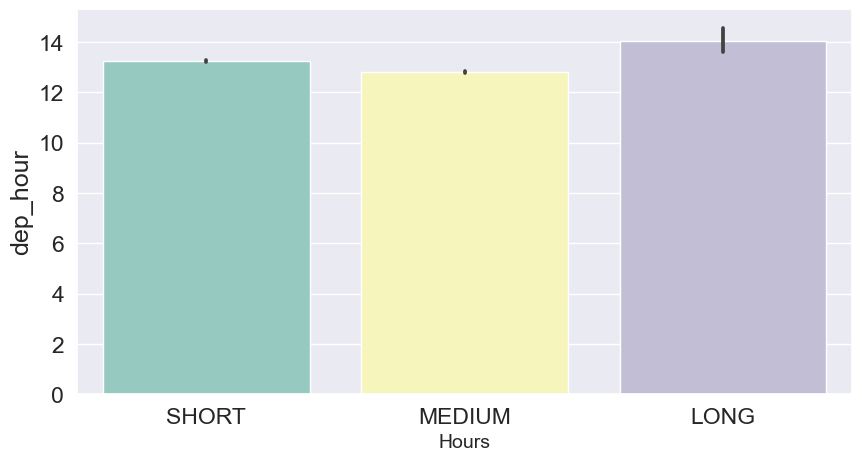

In [55]:
fig = plt.figure(1, figsize=(10,5))
sns.set(font_scale=1.5)
ax = sns.barplot(x='dist_class', y='dep_hour', data=df, palette='Set3')
ax.set_title('', fontsize=18)
ax.set_xlabel('Hours', fontsize=14)
plt.show()

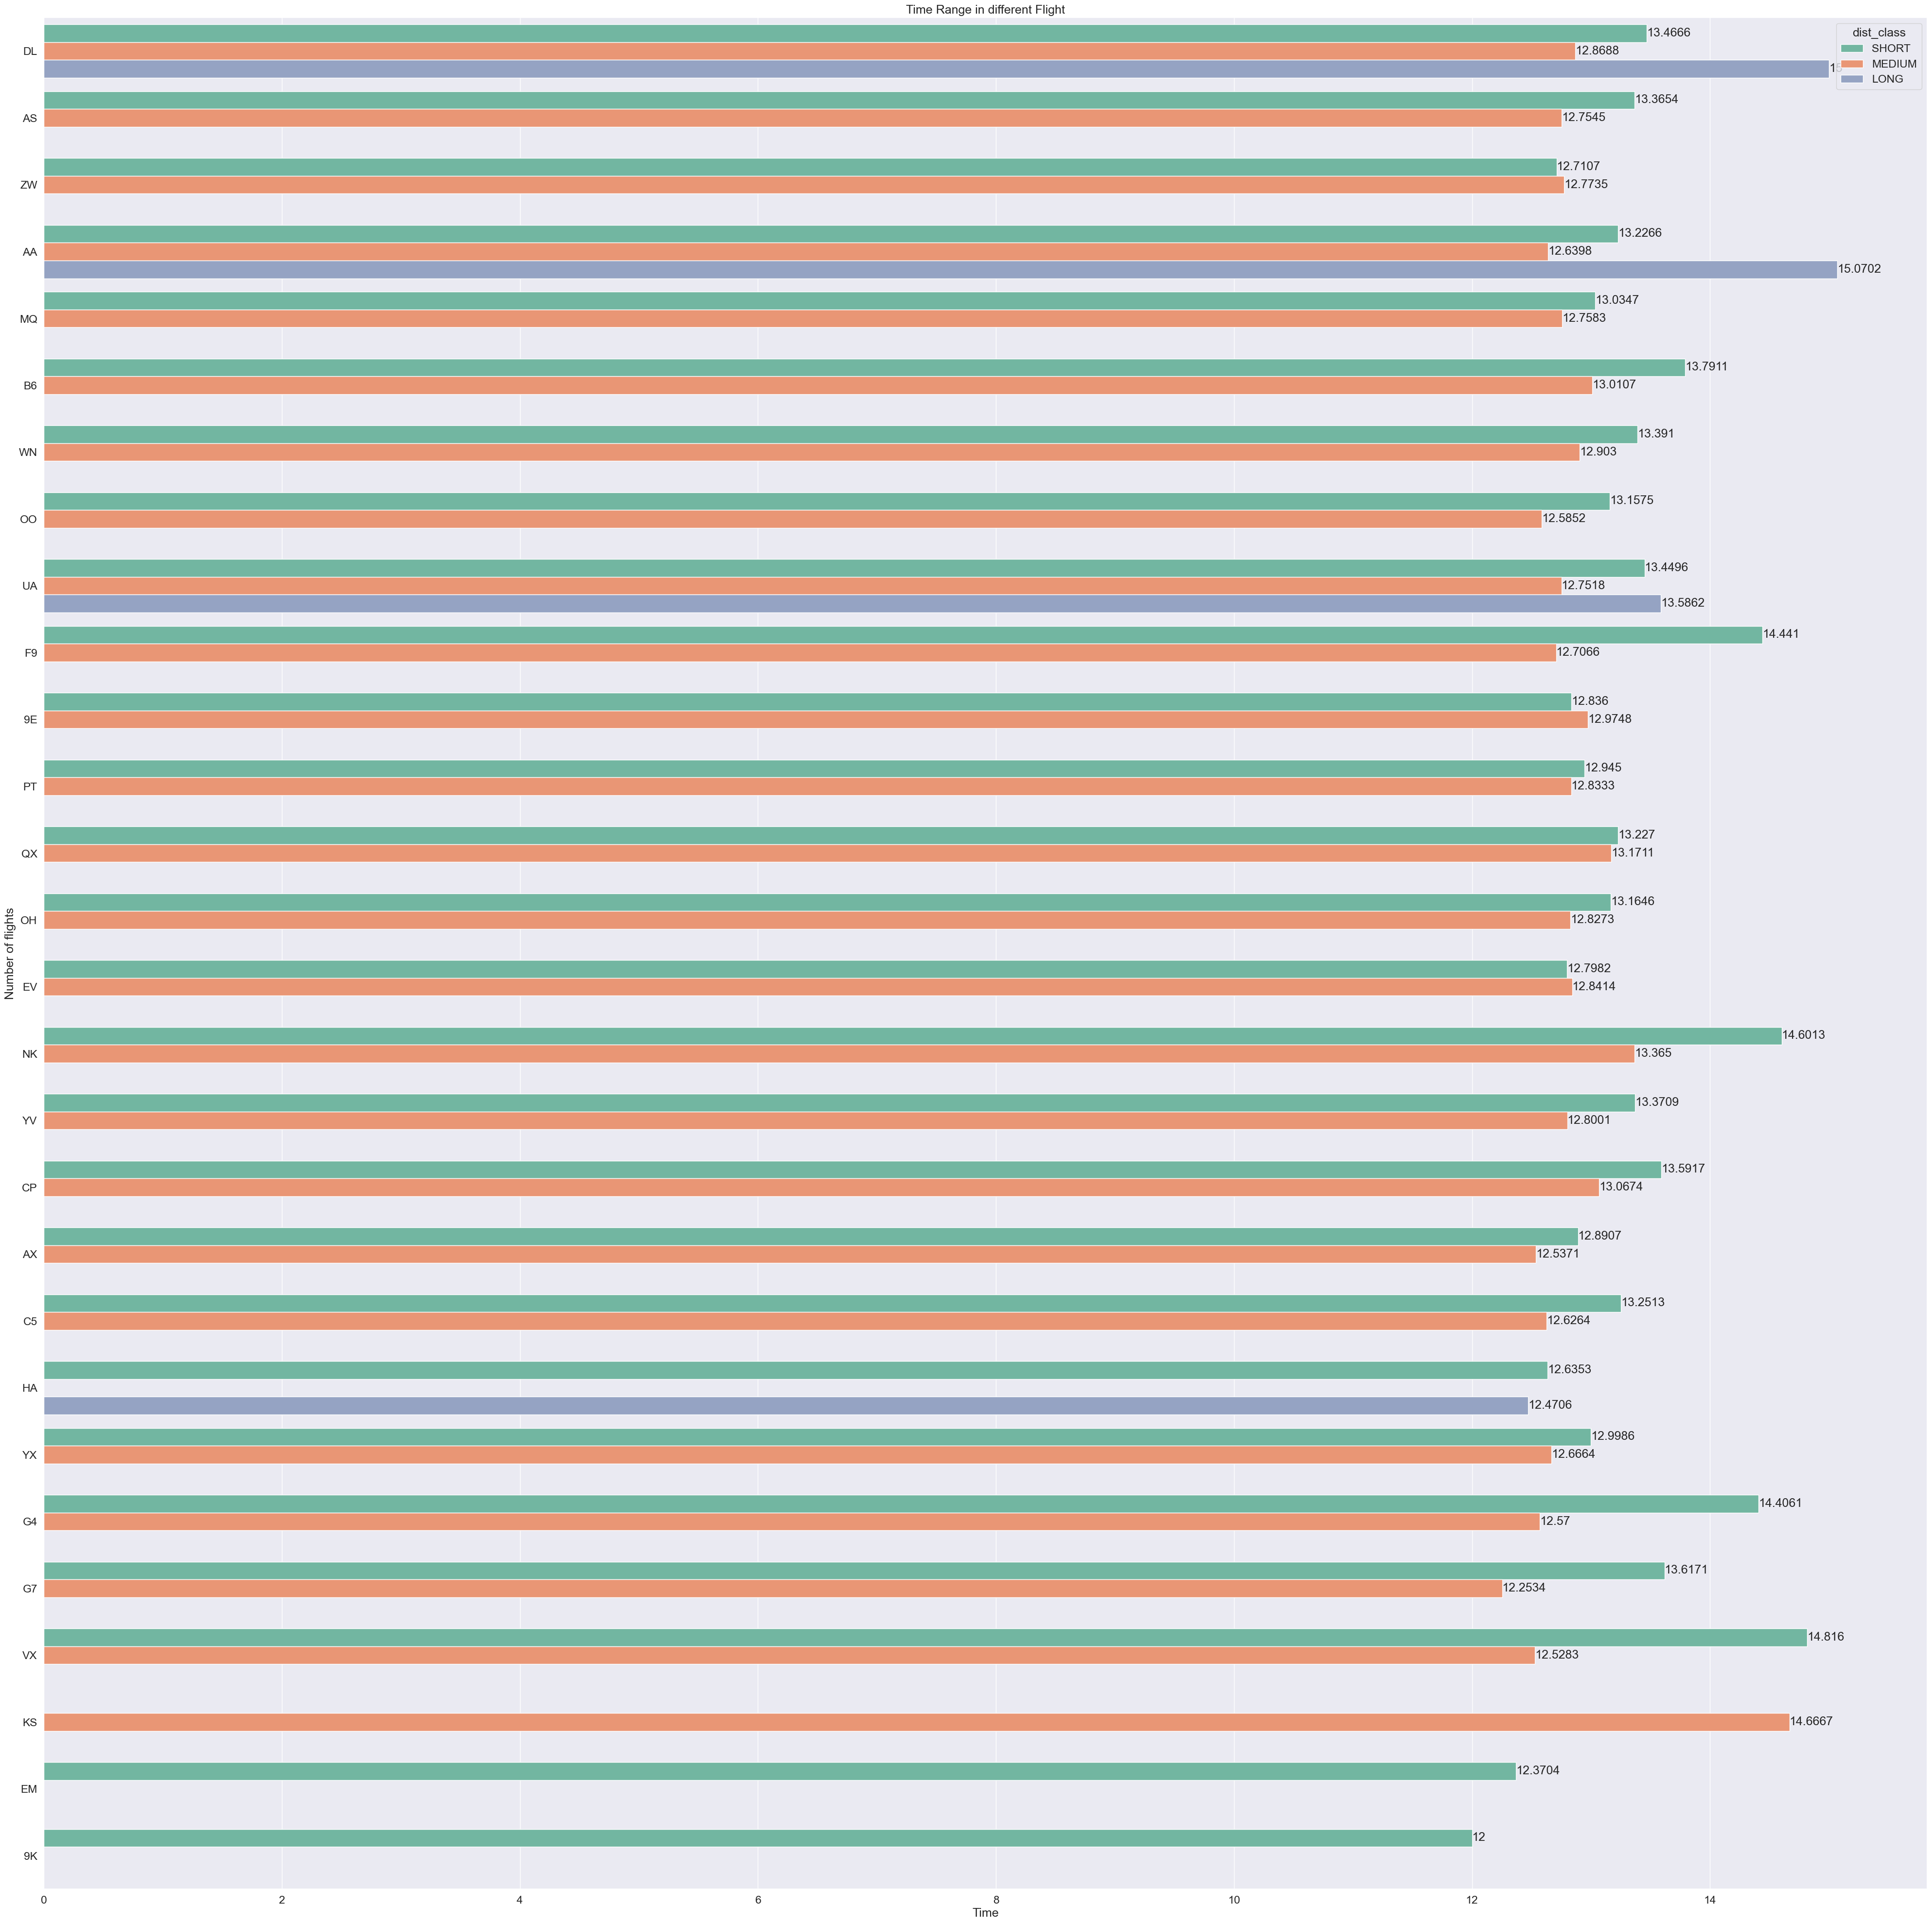

In [58]:
# time range do most flight haul take off
plt.figure(figsize=(50,50))
flight_haul = sns.barplot(data = df, x = 'dep_hour', y = 'op_unique_carrier', hue = 'dist_class', palette='Set2', errorbar = None)
flight_haul.set_title("Time Range in different Flight")
flight_haul.set_xlabel("Time")
flight_haul.set_ylabel("Number of flights")
for data in flight_haul.containers:
    flight_haul.bar_label(data,)